# Model Training and Saving
This notebook demonstrates how to train a Random Forest classifier on the preprocessed phishing dataset and save the trained model and vectorizer for later use.

In [1]:
# Install required packages
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Load the preprocessed dataset
df = pd.read_csv('../sample_data/cleaned_dataset.csv')

In [35]:
# Prepare features and labels
X = "Subject: " + df["subject"] + ". Body: " + df["body"]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [36]:
# Train Random Forest model
model = RandomForestClassifier(random_state=1)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9877631938747607
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6445
           1       0.99      0.99      0.99      8183

    accuracy                           0.99     14628
   macro avg       0.99      0.99      0.99     14628
weighted avg       0.99      0.99      0.99     14628



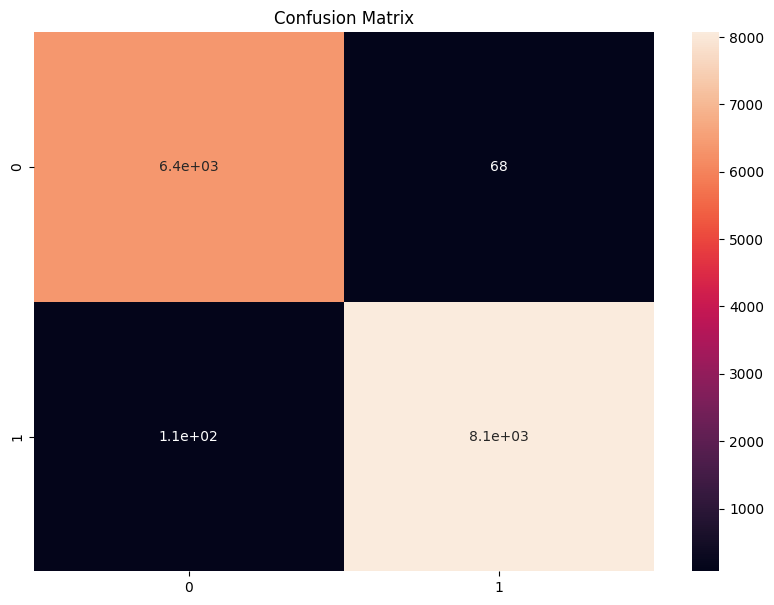

In [37]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

In [38]:
# View false positives and false negatives
false_positives = X_test[(y_pred == 1) & (y_test == 0)]
false_negatives = X_test[(y_pred == 0) & (y_test == 1)]
print("False Positives:")
print(false_positives)
print("False Negatives:")
print(false_negatives)

False Positives:
11581    Subject: cellphone charger. Body: message forw...
12989    Subject: dental nightmares fwd. Body: english ...
30745    Subject: fork happens etrade goes bankrupt. Bo...
41780    Subject: riaa site hacked overnight. Body: see...
44672    Subject: bust. Body: whats eariliest hitting k...
                               ...                        
34439    Subject: detecting hold. Body: check script qu...
17657    Subject: free integrated urban water manageme...
5623     Subject: criteria listed sablacklistcurrent. B...
12952    Subject: slash article. Body: like line days d...
45254    Subject: anacron job crondaily. Body: etccrond...
Length: 68, dtype: object
False Negatives:
47168    Subject: selling travel todays economy. Body: ...
28467    Subject: internet apoth. Body: germany wedged ...
46903    Subject: look desparately seeking lazy peoplew...
45974    Subject: weight loss secrets doctors famous st...
46101    Subject: join focus groups earn money. Body: h

In [39]:
# Save the model and vectorizer
model_path = '../app/model/model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)
vectorizer_path = '../app/model/vectorizer.pkl'
with open(vectorizer_path, 'wb') as file:
    pickle.dump(vectorizer, file)
print("Model and vectorizer saved.")

Model and vectorizer saved.
